In [1]:
from google.colab import drive
drive.mount('/content/drive')
#drive.flush_and_unmount()

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Investor Tracking Table**

In [3]:
df01 = pd.read_csv('/content/drive/MyDrive/MMAI 847 - AI Capstone Project/excel_1638 (2)_CLEANED1.csv')

In [4]:
df01.head(20)

,Investor Name,Account Number,Investor ID,Email,Phone,Status,Broker,Brokerage,Payment,DAP?,Documents,Additional Documents Uploaded?,Invited Date,Signed Date,Accepted Date,Value Subscribed,USD Value Subscribed,# of Securities Subscribed,# of US Securities Subscribed,Tags,Notes,Finder,Insider?,Registrant?,Beneficiary Address,Registration Holder Name,Registration TAN,Registration Address,Delivery Address (as entered),Delivery Organization & Contact,Delivery TAN,Delivery Contact Phone
0,Linton Family Trust (2040),5275880001,36423,bruce@brucelinton.com,16137991110,Complete,NaN,NaN,Funded,NaN,100% complete,False,2020-10-13 23:27:40 UTC,2021-01-18 19:58:07 UTC,2021-01-19 03:53:13 UTC,1750.00,NaN,1000,NaN,NaN,10/28 - articles of corporation supplied,NaN,Yes,NaN,"9 Shamrock Pl, Nepean, ON K2R 1A9, Canada",Canaccord Genuity Securties,20M-U96A-1,"Canaccord Genuity Corp, 609 Granville Street, ...",NaN,NaN,NaN,NaN
1,Graeme Davis,4276050008,36444,graemed@gageusa.com,19059715854,Complete,NaN,NaN,Funded,NaN,100% complete,True,2020-10-14 05:38:59 UTC,2020-12-11 19:00:36 UTC,2021-01-19 04:15:11 UTC,11375.00,NaN,6500,NaN,"#amlcleared, #id uploaded",Nov 23 - Called and left a VM asking him to co...,NaN,NaN,NaN,"1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",Graeme Davis,NaN,"1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",NaN,NaN,NaN,NaN
2,Jeffrey P Minor,2276290005,36469,jsjmm@yahoo.com,14192159157,Complete,NaN,NaN,Funded,NaN,100% complete,True,2020-10-14 12:25:50 UTC,2020-11-05 16:20:27 UTC,2020-12-04 21:56:08 UTC,5250.00,NaN,3000,NaN,#amlcleared,Oct 19 - Called Jeff to follow up on his wire ...,NaN,NaN,NaN,"5848 Mitchaw Rd, Sylvania, OH 43560, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Benjamin Gray,7276350004,36475,gray2389@gmail.com,16167964085,Signed,NaN,NaN,Unfunded,NaN,100% complete,False,2020-10-14 12:31:56 UTC,2020-10-14 12:39:31 UTC,NaN,1050.00,NaN,600,NaN,#dalmoredeficient,Nov 12 - Called and left a VM\n\nOct 23 - Call...,NaN,NaN,NaN,"1139 Lincoln Ave, Holland, MI 49423, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Felix Gonzalez,4276530005,36494,felixgonzalez09@gmail.com,13476589558,Complete,NaN,NaN,Funded,NaN,100% complete,True,2020-10-14 12:51:21 UTC,2020-10-14 13:17:39 UTC,2020-12-04 21:56:29 UTC,1050.00,NaN,600,NaN,#amlcleared,NaN,NaN,NaN,NaN,"32-45 69th St, Queens, NY 11377, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Robert J Wieczorkowski Jr,6276540007,36495,skidog97@icloud.com,15862314848,Signed,NaN,NaN,Unfunded,NaN,100% complete,False,2020-10-14 12:51:47 UTC,2020-10-22 16:27:29 UTC,NaN,1050.00,NaN,600,NaN,"#dalmoredeficient, #id",Nov 12 - Called and left a VM\n\n\nOct 22 - Sp...,NaN,NaN,NaN,42405 Clinton Place Dr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jeffrey,9276700007,36517,jeffrocuz123@yahoo.com,12487701002,Submitted,NaN,NaN,Unfunded,NaN,100% complete,False,2020-10-14 13:14:32 UTC,2020-11-19 20:43:01 UTC,NaN,1750.00,NaN,1000,NaN,NaN,Nov 16 - Left him VM to complete the process.\...,NaN,NaN,NaN,"28606 Bayberry Park Dr, Livonia, MI 48154, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Casey J Pierce,2276740006,36521,cpierce918@gmail.com,15179182332,Complete,NaN,NaN,Funded,NaN,100% complete,False,2020-10-14 13:18:15 UTC,2020-10-17 03:46:49 UTC,2020-12-04 21:56:48 UTC,1050.00,NaN,600,NaN,#amlcleared,Oct 23 - Spoke with Casey and he is going to u...,NaN,NaN,NaN,"3322 Gingersnap Ln, Lansing, MI 48911, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Zvonimir Petric,4276790006,36526,zvon@atyourserver.ca,14168953820,Complete,NaN,NaN,Funded,NaN,100% complete,True,2020-10-14 13:22:04 UTC,2020-10-14 13:32:23 UTC,2020-12-04 21:57:03 UTC,1050.00,NaN,600,NaN,NaN,Oct 19 - Follow up call completed and VM left....,NaN,NaN,NaN,"33 Terrace Dr, Dundas, ON L9H 3X1, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Revan Hermiz,5276830006,36530,revanhermiz@gmail.com,12486333370,Complete,NaN,NaN,Funded,NaN,100% complete,True,2020-10-14 13:29:39 UTC,2020-11-02 17:50:14 UTC,2020-12-04 21:57:18 UTC,5250.00,NaN,3000,NaN,#amlcleared,Nov 12 - Called and left a VM\n\nNov 5 - Calle...,NaN,NaN,NaN,"5368 Pine Aires Dr, 

In [5]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Investor Name                    1174 non-null   object 
 1   Account Number                   1174 non-null   object 
 2   Investor ID                      1174 non-null   int64  
 3   Email                            1174 non-null   object 
 4   Phone                            1174 non-null   object 
 5   Status                           1174 non-null   object 
 6   Broker                           0 non-null      float64
 7   Brokerage                        0 non-null      float64
 8   Payment                          1174 non-null   object 
 9   DAP?                             0 non-null      float64
 10  Documents                        1174 non-null   object 
 11  Additional Documents Uploaded?   1174 non-null   bool   
 12  Invited Date        

#### In order to have a cleaner dataset composed of more relevant features, let's remove features with smaller number of non-null elements.

In [6]:
# too few information
remove_cols = ['Broker', 'Brokerage', 'DAP?', 'USD Value Subscribed', '# of US Securities Subscribed', 'Finder', 'Insider?', 
               'Registrant?', 'Delivery Address (as entered)', 'Delivery Organization & Contact', 'Delivery TAN', 'Delivery Contact Phone',

                # less relevant
               'Notes', 'Registration TAN']


df01_cleaned = df01.drop(remove_cols, axis=1)

In [7]:
df01_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Investor Name                   1174 non-null   object 
 1   Account Number                  1174 non-null   object 
 2   Investor ID                     1174 non-null   int64  
 3   Email                           1174 non-null   object 
 4   Phone                           1174 non-null   object 
 5   Status                          1174 non-null   object 
 6   Payment                         1174 non-null   object 
 7   Documents                       1174 non-null   object 
 8   Additional Documents Uploaded?  1174 non-null   bool   
 9   Invited Date                    1164 non-null   object 
 10  Signed Date                     1164 non-null   object 
 11  Accepted Date                   1027 non-null   object 
 12  Value Subscribed                11

#### **EDA with Pandas Profiling**

In [15]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 38.3MB 643kB/s
     |████████████████████████████████| 10.1MB 6.5MB/s 
     |████████████████████████████████| 645kB 33.4MB/s 
     |████████████████████████████████| 112kB 46.2MB/s 
     |████████████████████████████████| 1.1MB 26.9MB/s 
     |████████████████████████████████| 3.1MB 35.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 296kB 37.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=8581614c284431084ae567f550cba55b8f03f98e089304b26b5a29133cf1e8b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-tzvwm75i/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=e6acb19e3714bedf38c091b4cd54032fc35ff9d7644d0106f2979c84661e5a7d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f9406

In [16]:
# import ProfileReport
from pandas_profiling import ProfileReport

In [ ]:
# Execute profile
profile1 = ProfileReport(df01_cleaned, title='Report of CLEANED Investor Tracking Table - Pandas Profiling', html={'style':{'full_width':True}})
profile1

Output hidden; open in https://colab.research.google.com to view.

### **Transactions**

In [8]:
df02 = pd.read_csv('/content/drive/MyDrive/MMAI 847 - AI Capstone Project/excel_1638 (2)_CLEANED2.csv')

In [9]:
df02.head(10)

,Investor Name,Email,Account Number,Investor ID,Transaction Funded by User,Currency,Date,Value,Status,Book-keeping Date,Book-keeping Value,Transaction Type,Institution No.,External ID,Notes
0,Linton Family Trust (2040),bruce@brucelinton.com,5.275880e+09,36423,rebecca+adminlawyer@dealmaker.tech,USD,2020-10-27 00:00:00 UTC-05:00,175000.0,approved,2020-10-26 00:00:00 UTC-05:00,174990.0,Direct,NaN,NaN,TRN 20201026-011856 SENDING ABA: 026005092 WEL...
1,Linton Family Trust (2040),bruce@brucelinton.com,5.275880e+09,36423,admin@dealmaker.tech,USD,2021-01-19 00:00:00 UTC-05:00,-1750.0,approved,2021-01-15 00:00:00 UTC-05:00,-1750.0,Wire,NaN,NaN,partial refund
2,Linton Family Trust (2040),bruce@brucelinton.com,5.275880e+09,36423,nicole@dealmaker.tech,USD,2021-01-21 00:00:00 UTC-05:00,-171500.0,approved,2021-01-21 00:00:00 UTC-05:00,-171500.0,Wire,NaN,NaN,Refund
3,Graeme Davis,graemed@gageusa.com,4.276050e+09,36444,graemed@gageusa.com,USD,2020-12-11 00:00:00 UTC-05:00,11375.0,failed,2020-12-11 00:00:00 UTC-05:00,11375.0,Credit card,NaN,DHZRvfCuR0Wz_uf4AaQX1Q,2020-12-11 19:03:13 UTC: Transaction submitted...
4,Graeme Davis,graemed@gageusa.com,4.276050e+09,36444,graemed@gageusa.com,USD,2020-12-16 00:00:00 UTC-05:00,11375.0,failed,2020-12-16 00:00:00 UTC-05:00,11375.0,Credit card,NaN,FMRJyCuFTI-8qUVGhJHglA,2020-12-16 12:41:36 UTC: Transaction submitted...
5,Graeme Davis,graemed@gageusa.com,4.276050e+09,36444,graemed@gageusa.com,USD,2020-12-16 00:00:00 UTC-05:00,11375.0,approved,2020-12-16 00:00:00 UTC-05:00,11375.0,Credit card,NaN,sC6lAGQWQICICU2OyMXkYQ,2020-12-16 12:55:22 UTC: Transaction submitted...
6,Jeffrey P Minor,jsjmm@yahoo.com,2.276290e+09,36469,jsjmm@yahoo.com,USD,2020-11-05 00:00:00 UTC-05:00,5250.0,approved,2020-11-05 00:00:00 UTC-05:00,5250.0,Ach transfer,NaN,2Eg1kbAtT0Oy1DGdNw0bvg,2020-11-05 16:25:55 UTC: Transaction status on...
7,Felix Gonzalez,felixgonzalez09@gmail.com,4.276530e+09,36494,felixgonzalez09@gmail.com,USD,2020-10-14 00:00:00 UTC-05:00,1050.0,approved,2020-10-14 00:00:00 UTC-05:00,1050.0,Ach transfer,NaN,XP9cZLOTRTS1CtDRIcevbQ,2020-10-14 13:25:18 UTC: Transaction status on...
8,Jeffrey,jeffrocuz123@yahoo.com,9.276700e+09,36517,jeffrocuz123@yahoo.com,USD,2020-11-19 00:00:00 UTC-05:00,1750.0,failed,2020-11-19 00:00:00 UTC-05:00,1750.0,Credit card,NaN,W7_7NSErR52fNCRDddJjKQ,2020-12-01 05:03:44 UTC: Transaction failed on...
9,Jeffrey,jeffrocuz123@yahoo.com,9.276700e+09,36517,jeffrocuz123@yahoo.com,USD,2020-12-02 00:00:00 UTC-05:00,1750.0,failed,2020-12-02 00:00:00 UTC-05:00,1750.0,Credit card,NaN,w_gEeQEYTB2mhZRXS0hAEA,2020-12-02 20:50:30 UTC: Transaction submitted...


In [10]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Investor Name               1298 non-null   object 
 1   Email                       1298 non-null   object 
 2   Account Number              1288 non-null   float64
 3   Investor ID                 1298 non-null   int64  
 4   Transaction Funded by User  1298 non-null   object 
 5   Currency                    1298 non-null   object 
 6   Date                        1298 non-null   object 
 7   Value                       1298 non-null   float64
 8   Status                      1298 non-null   object 
 9   Book-keeping Date           1298 non-null   object 
 10  Book-keeping Value          1298 non-null   float64
 11  Transaction Type            1298 non-null   object 
 12  Institution No.             0 non-null      float64
 13  External ID                 1066 

In [11]:
df02['Notes'].value_counts()

refund                                                                                                                                                                                                                                                                                                                                                                                                                20
EDEPOSIT                                                                                                                                                                                                                                                                                                                                                                                                               8
2020-12-07 21:15:29 UTC: Transaction invested on external processor for fund disbursement. Status is INVESTED                                                                         

In [12]:
df02_cleaned = df02.drop('Institution No.', axis=1)

In [13]:
df02_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Investor Name               1298 non-null   object 
 1   Email                       1298 non-null   object 
 2   Account Number              1288 non-null   float64
 3   Investor ID                 1298 non-null   int64  
 4   Transaction Funded by User  1298 non-null   object 
 5   Currency                    1298 non-null   object 
 6   Date                        1298 non-null   object 
 7   Value                       1298 non-null   float64
 8   Status                      1298 non-null   object 
 9   Book-keeping Date           1298 non-null   object 
 10  Book-keeping Value          1298 non-null   float64
 11  Transaction Type            1298 non-null   object 
 12  External ID                 1066 non-null   object 
 13  Notes                       1285 

In [17]:
# Execute profile
profile2 = ProfileReport(df02_cleaned, title='Report of CLEANED Transactions - Pandas Profiling', html={'style':{'full_width':True}})
profile2

Output hidden; open in https://colab.research.google.com to view.

### **Parsed Addresses**

In [18]:
df03 = pd.read_csv('/content/drive/MyDrive/MMAI 847 - AI Capstone Project/excel_1638 (2)_CLEANED3.csv')

In [19]:
df03.head()

,Investor Name,Status,Beneficiary Address (as entered),Beneficiary Street Address (parsed),Beneficiary Suite Number (parsed),Beneficiary Municipality (parsed),Beneficiary Province/State (parsed),Beneficiary Postal Code (parsed),Beneficiary Country (parsed),Registration Address (as entered),Registration Holder Street Address (parsed),Registration Suite Number (parsed),Registration Holder Municipality (parsed),Registration Holder Province/State (parsed),Registration Holder Postal Code (parsed),Registration Holder Country (parsed),Delivery Address (as entered),Delivery Street Address (parsed),Delivery Suite Number (parsed),Delivery Municipality (parsed),Delivery Province/State (parsed),Delivery Postal Code (parsed),Delivery Country (parsed)
0,Linton Family Trust (2040),Complete,"9 Shamrock Pl, Nepean, ON K2R 1A9, Canada",9 Shamrock Place,NaN,Ottawa,Ontario,K2R1A9,Canada,"Canaccord Genuity Corp, 609 Granville Street, ...",609 Granville Street,NaN,Vancouver,British Columbia,V7Y1H2,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Graeme Davis,Complete,"1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",NaN,NaN,NaN,NaN,NaN,NaN,"1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jeffrey P Minor,Complete,"5848 Mitchaw Rd, Sylvania, OH 43560, USA",5848 Mitchaw Road,NaN,Sylvania,Ohio,43560,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Benjamin Gray,Signed,"1139 Lincoln Ave, Holland, MI 49423, USA",1139 Lincoln Avenue,NaN,Holland,Michigan,49423,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Felix Gonzalez,Complete,"32-45 69th St, Queens, NY 11377, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Investor Name                                1174 non-null   object 
 1   Status                                       1174 non-null   object 
 2   Beneficiary Address (as entered)             1174 non-null   object 
 3   Beneficiary Street Address (parsed)          1087 non-null   object 
 4   Beneficiary Suite Number (parsed)            0 non-null      float64
 5   Beneficiary Municipality (parsed)            1073 non-null   object 
 6   Beneficiary Province/State (parsed)          1092 non-null   object 
 7   Beneficiary Postal Code (parsed)             1088 non-null   object 
 8   Beneficiary Country (parsed)                 1093 non-null   object 
 9   Registration Address (as entered)            173 non-null    object 
 10  

In [21]:
# too few information
Remove_cols = ['Beneficiary Suite Number (parsed)', 'Registration Suite Number (parsed)', 'Delivery Address (as entered)', 'Delivery Street Address (parsed)',
               'Delivery Suite Number (parsed)', 'Delivery Municipality (parsed)', 'Delivery Province/State (parsed)', 'Delivery Postal Code (parsed)',
               'Delivery Country (parsed)']  



df03_cleaned = df03.drop(Remove_cols, axis=1)

In [22]:
df03_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Investor Name                                1174 non-null   object
 1   Status                                       1174 non-null   object
 2   Beneficiary Address (as entered)             1174 non-null   object
 3   Beneficiary Street Address (parsed)          1087 non-null   object
 4   Beneficiary Municipality (parsed)            1073 non-null   object
 5   Beneficiary Province/State (parsed)          1092 non-null   object
 6   Beneficiary Postal Code (parsed)             1088 non-null   object
 7   Beneficiary Country (parsed)                 1093 non-null   object
 8   Registration Address (as entered)            173 non-null    object
 9   Registration Holder Street Address (parsed)  151 non-null    object
 10  Registration

In [23]:
df03_cleaned['Registration Holder Country (parsed)'].value_counts()

United States    132
Canada            20
Mexico             1
Name: Registration Holder Country (parsed), dtype: int64

In [24]:
df03_cleaned['Registration Holder Municipality (parsed)'].value_counts()

Toronto          10
San Francisco     4
Portland          3
Los Angeles       3
Markham           3
                 ..
San Fernando      1
Lake Mary         1
Dallas            1
Lynnfield         1
Chicago           1
Name: Registration Holder Municipality (parsed), Length: 128, dtype: int64

### **Investor Participation Tracking**

In [ ]:
df04 = pd.read_csv('/content/drive/MyDrive/MMAI 847 - AI Capstone Project/excel_1638 (2)_CLEANED4.csv')

In [ ]:
df04.head()

,Investor Name,Investor ID,DealMaker Account ID,Investor Email,si35,si36,si39,si42,si43,si62,si63,Please enter the residential or beneficial address of [investor_name]:,"Please confirm whether [beneficial_address] is the complete address for [investor_name]. <br> If there is a second line to the address, you will be asked to enter it in the next question. <br>If the address is otherwise incomplete, or contains a mistake, please click on ""Previous Question"" and correct it.",Please enter the Business Number (or U.S. Employer Identification Number/Tax Identification Number) of [investor_name]:,Please enter the phone number of [investor_name]:,What is the address of [beneficiary_1_name]?,What is the birth date of [beneficiary_1_name]?,The next few questions aim to collect some more detailed information about each of the beneficiaries of [investor_name]. <br>What is the name of beneficiary 1?,What is the Social Insurance Number (SIN) of [beneficiary_1_name]?,Does [investor_name] have more beneficiaries?,What is the address of [beneficiary_2_name]?,What is the birth date of [beneficiary_2_name]?,The next few questions aim to collect some more detailed information about the second beneficiary of [investor_name]. <br>What is the name of beneficiary 2?,What is the Social Insurance Number (SIN) of [beneficiary_2_name]?,Does [investor_name] have more beneficiaries?.1,"Will the securities be registered in a custodial account (i.e. IRA, Keogh)?","Please enter the initials of the investor (or the authorized signing officer for the investor, in the case that the investor is an Entity):",Is [investor_name] an insider of [company_name]?,Please enter [investor_name]'s total investment amount in [deal_name]:,Please enter the name of the investor:,"In order to assist us in collecting the appropriate information, could you please confirm whether the investor is an individual or an entity?",Please select the most applicable category for [investor_name]:,Which of the following is [investor_name]?,"Is the subscriber (or authorized signing officer, if entity) or any member of the subscriber's (or authorized signing officer's) family a politically exposed foreign person?",Please enter the number of [security_type] [investor_name] is purchasing:,"Is [investor_name] a registrant (a person or company registered or required to be registered under applicable securities laws in Canada). <br> This is generally someone who is in the business of trading in or advising on securities, e.g. an investment advisor.","Is [investor_name] buying the securities using funds from a brokerage account? Note: If you do not have the exact registration instructions for your brokerage account click ""no"".",What would you like as the registered holder name?,What would you like as the registered holder address?,Is there an account reference for the registration instructions?,Please provide trading account number:,What is the date of birth of [signing_officer_name]?,Please enter the name of the authorized signing officer for [investor_name]:,Please enter the title of the authorized signing officer for [investor_name] (including the name of the General Partner if applicable):,What is the address of [trustee_1_name]?,What is the birth date of [trustee_1_name]?,The next few questions aim to collect some more detailed information about each of the trustees of [investor_name]. <br>What is the name of trustee 1?,What is the Social Insurance Number (SIN) of [trustee_1_name]?,Does [investor_name] have more trustees?,What is the address of [trustee_2_name]?,What is the birth date of [trustee_2_name]?,The next few questions aim to collect some more detailed information about the second trustee of [investor_name]. <br>What is the name of trustee 2?,What is the Social Insurance Number (SIN) of [trustee_2_name]?,Does [investor_name] have more trustees?.1,"You are about to be asked a series of questions relating to the ownership (Trustees) of [investor_name]. If you do not have this informat

In [ ]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 55 columns):
 #   Column                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                              --------------  ----- 
 0   Investor Name                                                                                                                                                                                                           

#### Merge **df01_cleaned** and **df02_cleaned** into a single dataframe using the "Investor Name" feature.

In [25]:
df12 = pd.merge(df01_cleaned, df02_cleaned, how='inner', on='Investor Name')
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Investor Name                   1347 non-null   object 
 1   Account Number_x                1347 non-null   object 
 2   Investor ID_x                   1347 non-null   int64  
 3   Email_x                         1347 non-null   object 
 4   Phone                           1347 non-null   object 
 5   Status_x                        1347 non-null   object 
 6   Payment                         1347 non-null   object 
 7   Documents                       1347 non-null   object 
 8   Additional Documents Uploaded?  1347 non-null   bool   
 9   Invited Date                    1335 non-null   object 
 10  Signed Date                     1335 non-null   object 
 11  Accepted Date                   1233 non-null   object 
 12  Value Subscribed                13

In [26]:
df12.head()

,Investor Name,Account Number_x,Investor ID_x,Email_x,Phone,Status_x,Payment,Documents,Additional Documents Uploaded?,Invited Date,Signed Date,Accepted Date,Value Subscribed,# of Securities Subscribed,Tags,Beneficiary Address,Registration Holder Name,Registration Address,Email_y,Account Number_y,Investor ID_y,Transaction Funded by User,Currency,Date,Value,Status_y,Book-keeping Date,Book-keeping Value,Transaction Type,External ID,Notes
0,Linton Family Trust (2040),5275880001,36423,bruce@brucelinton.com,16137991110,Complete,Funded,100% complete,False,2020-10-13 23:27:40 UTC,2021-01-18 19:58:07 UTC,2021-01-19 03:53:13 UTC,1750.0,1000,NaN,"9 Shamrock Pl, Nepean, ON K2R 1A9, Canada",Canaccord Genuity Securties,"Canaccord Genuity Corp, 609 Granville Street, ...",bruce@brucelinton.com,5.275880e+09,36423,rebecca+adminlawyer@dealmaker.tech,USD,2020-10-27 00:00:00 UTC-05:00,175000.0,approved,2020-10-26 00:00:00 UTC-05:00,174990.0,Direct,NaN,TRN 20201026-011856 SENDING ABA: 026005092 WEL...
1,Linton Family Trust (2040),5275880001,36423,bruce@brucelinton.com,16137991110,Complete,Funded,100% complete,False,2020-10-13 23:27:40 UTC,2021-01-18 19:58:07 UTC,2021-01-19 03:53:13 UTC,1750.0,1000,NaN,"9 Shamrock Pl, Nepean, ON K2R 1A9, Canada",Canaccord Genuity Securties,"Canaccord Genuity Corp, 609 Granville Street, ...",bruce@brucelinton.com,5.275880e+09,36423,admin@dealmaker.tech,USD,2021-01-19 00:00:00 UTC-05:00,-1750.0,approved,2021-01-15 00:00:00 UTC-05:00,-1750.0,Wire,NaN,partial refund
2,Linton Family Trust (2040),5275880001,36423,bruce@brucelinton.com,16137991110,Complete,Funded,100% complete,False,2020-10-13 23:27:40 UTC,2021-01-18 19:58:07 UTC,2021-01-19 03:53:13 UTC,1750.0,1000,NaN,"9 Shamrock Pl, Nepean, ON K2R 1A9, Canada",Canaccord Genuity Securties,"Canaccord Genuity Corp, 609 Granville Street, ...",bruce@brucelinton.com,5.275880e+09,36423,nicole@dealmaker.tech,USD,2021-01-21 00:00:00 UTC-05:00,-171500.0,approved,2021-01-21 00:00:00 UTC-05:00,-171500.0,Wire,NaN,Refund
3,Graeme Davis,4276050008,36444,graemed@gageusa.com,19059715854,Complete,Funded,100% complete,True,2020-10-14 05:38:59 UTC,2020-12-11 19:00:36 UTC,2021-01-19 04:15:11 UTC,11375.0,6500,"#amlcleared, #id uploaded","1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",Graeme Davis,"1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",graemed@gageusa.com,4.276050e+09,36444,graemed@gageusa.com,USD,2020-12-11 00:00:00 UTC-05:00,11375.0,failed,2020-12-11 00:00:00 UTC-05:00,11375.0,Credit card,DHZRvfCuR0Wz_uf4AaQX1Q,2020-12-11 19:03:13 UTC: Transaction submitted...
4,Graeme Davis,4276050008,36444,graemed@gageusa.com,19059715854,Complete,Funded,100% complete,True,2020-10-14 05:38:59 UTC,2020-12-11 19:00:36 UTC,2021-01-19 04:15:11 UTC,11375.0,6500,"#amlcleared, #id uploaded","1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",Graeme Davis,"1092 Hamilton Regional Rd 8, Stoney Creek, ON ...",graemed@gageusa.com,4.276050e+09,36444,graemed@gageusa.com,USD,2020-12-16 00:00:00 UTC-05:00,11375.0,failed,2020-12-16 00:00:00 UTC-05:00,11375.0,Credit card,FMRJyCuFTI-8qUVGhJHglA,2020-12-16 12:41:36 UTC: Transaction submitted...


In [ ]:
# Execute profile
profile12 = ProfileReport(df12, title='Report of CLEANED (Investor Tracking Table + Transactions) - Pandas Profiling', html={'style':{'full_width':True}})
profile12

Output hidden; open in https://colab.research.google.com to view.

## **EDA**

In [27]:
df12.describe()

,Investor ID_x,Value Subscribed,# of Securities Subscribed,Account Number_y,Investor ID_y,Value,Book-keeping Value
count,1347.000000,1.347000e+03,1.347000e+03,1.335000e+03,1347.000000,1.347000e+03,1.347000e+03
mean,44911.235338,4.810824e+04,2.749042e+04,5.228023e+09,44913.166295,4.597934e+04,4.597935e+04
std,3762.568316,6.037975e+05,3.450271e+05,2.563339e+09,3758.551627,6.039470e+05,6.039470e+05
min,36423.000000,1.050000e+03,6.000000e+02,1.114810e+09,36423.000000,-2.450000e+05,-2.450000e+05
25%,42629.500000,1.312500e+03,7.500000e+02,3.169110e+09,42630.000000,1.050000e+03,1.050875e+03
50%,45969.000000,2.499000e+03,1.428000e+03,5.294190e+09,45965.000000,2.100000e+03,2.100000e+03
75%,47805.500000,7.000000e+03,4.000000e+03,7.348300e+09,47805.500000,5.250000e+03,5.250000e+03
max,50067.000000,1.562500e+07,8.928572e+06,9.819400e+09,50067.000000,1.562500e+07,1.562500e+07


In [28]:
df12.columns

Index(['Investor Name', 'Account Number_x', 'Investor ID_x', 'Email_x',
       'Phone', 'Status_x', 'Payment', 'Documents',
       'Additional Documents Uploaded?', 'Invited Date', 'Signed Date',
       'Accepted Date', 'Value Subscribed', '# of Securities Subscribed',
       'Tags', 'Beneficiary Address', 'Registration Holder Name',
       'Registration Address', 'Email_y', 'Account Number_y', 'Investor ID_y',
       'Transaction Funded by User', 'Currency', 'Date', 'Value', 'Status_y',
       'Book-keeping Date', 'Book-keeping Value', 'Transaction Type',
       'External ID', 'Notes'],
      dtype='object')

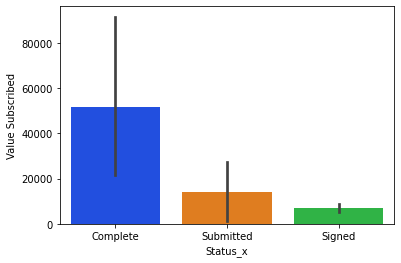

In [29]:
sns.barplot(x='Status_x',y='Value Subscribed',data=df12, palette="bright")

# Merge **df01_cleaned**, **df02_cleaned** and **df03_cleaned** into a single dataframe using the "Investor Name" feature.

In [30]:
df123 = pd.merge(df12, df03_cleaned, how='inner', on='Investor Name')
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Investor Name                                1451 non-null   object 
 1   Account Number_x                             1451 non-null   object 
 2   Investor ID_x                                1451 non-null   int64  
 3   Email_x                                      1451 non-null   object 
 4   Phone                                        1451 non-null   object 
 5   Status_x                                     1451 non-null   object 
 6   Payment                                      1451 non-null   object 
 7   Documents                                    1451 non-null   object 
 8   Additional Documents Uploaded?               1451 non-null   bool   
 9   Invited Date                                 1435 non-null   object 
 10  

In [ ]:
profile123 = ProfileReport(df123, title='Report of CLEANED (Investor Tracking Table + Transactions + Parsed Addresses) - Pandas Profiling', html={'style':{'full_width':True}})
profile123

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'correlations before removing duplicates')

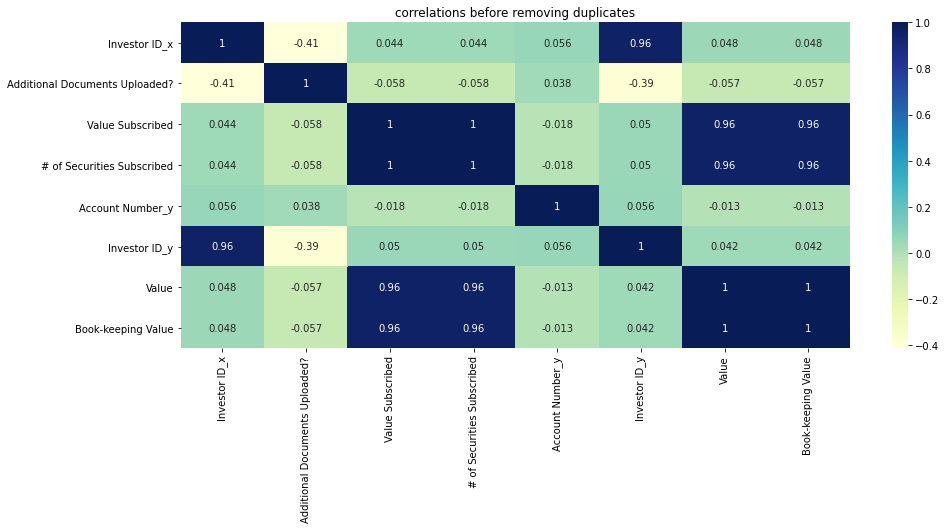

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(df123.corr(),annot=True, cmap="YlGnBu")
plt.title('correlations before removing duplicates')

In [32]:
df123.shape

(1451, 44)

In [33]:
df123 = df123.drop_duplicates()
df123.shape

(1379, 44)

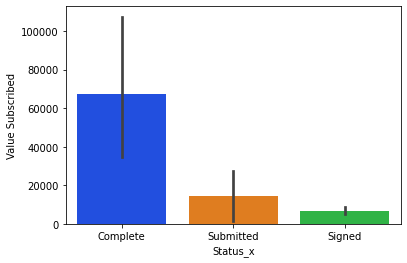

In [34]:
sns.barplot(x='Status_x',y='Value Subscribed',data=df123, palette="bright")

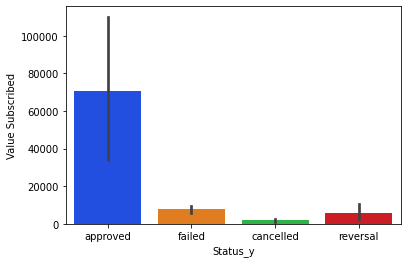

In [35]:
sns.barplot(x='Status_y',y='Value Subscribed',data=df123, palette="bright")

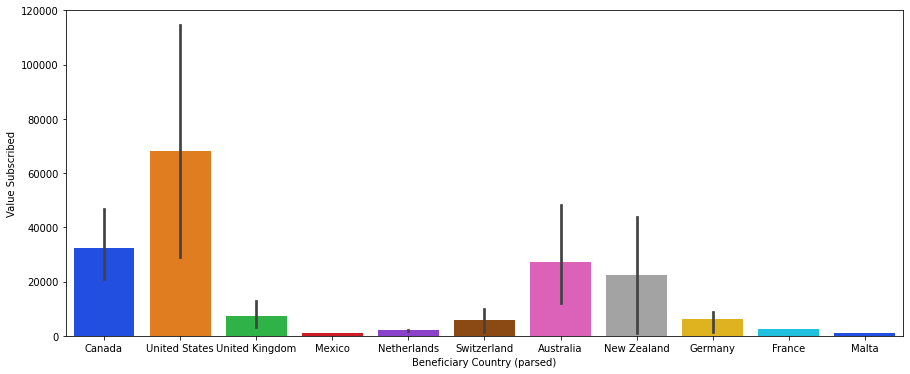

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.barplot(x='Beneficiary Country (parsed)',y='Value Subscribed',data=df123, palette="bright")

Text(0.5, 1.0, 'correlations after removing duplicates')

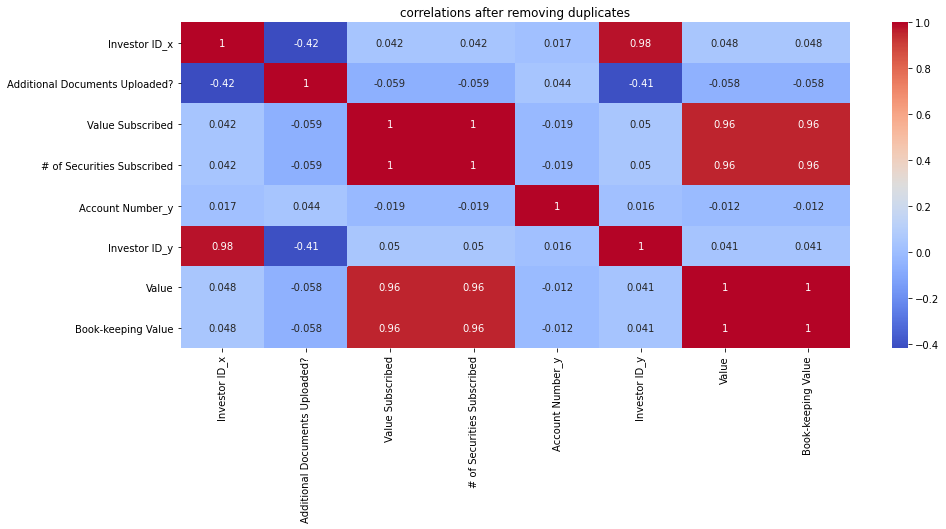

In [37]:
plt.figure(figsize=(15,6))
sns.heatmap(df123.corr(),annot=True,cmap='coolwarm')
plt.title('correlations after removing duplicates')

In [ ]:
df123['Status_y'].value_counts()

approved     1198
failed        152
reversal       21
cancelled       8
Name: Status_y, dtype: int64

In [ ]:
df123[df123['Status_y'] == 'failed'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 3 to 1390
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Investor Name                                152 non-null    object 
 1   Account Number_x                             152 non-null    object 
 2   Investor ID_x                                152 non-null    int64  
 3   Email_x                                      152 non-null    object 
 4   Phone                                        152 non-null    object 
 5   Status_x                                     152 non-null    object 
 6   Payment                                      152 non-null    object 
 7   Documents                                    152 non-null    object 
 8   Additional Documents Uploaded?               152 non-null    bool   
 9   Invited Date                                 152 non-null    object 
 10  S

Text(0.5, 1.0, 'Status Failed')

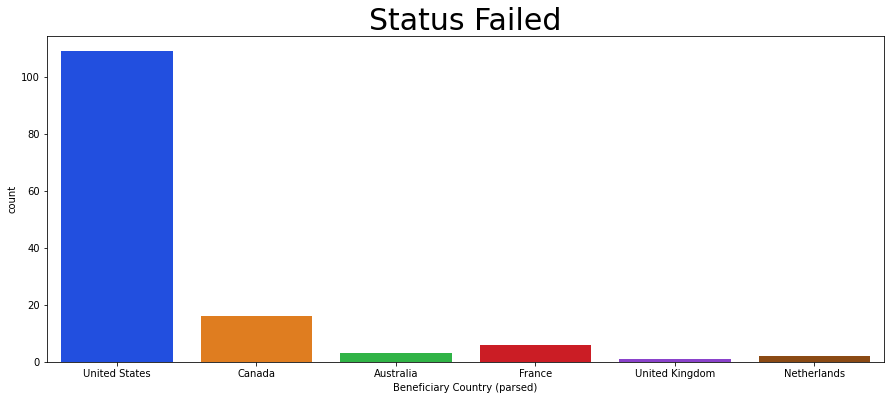

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Beneficiary Country (parsed)',data=df123[df123['Status_y'] == 'failed'], palette="bright")
plt.title('Status Failed', fontsize = 30)

Text(0.5, 1.0, 'Status Failed')

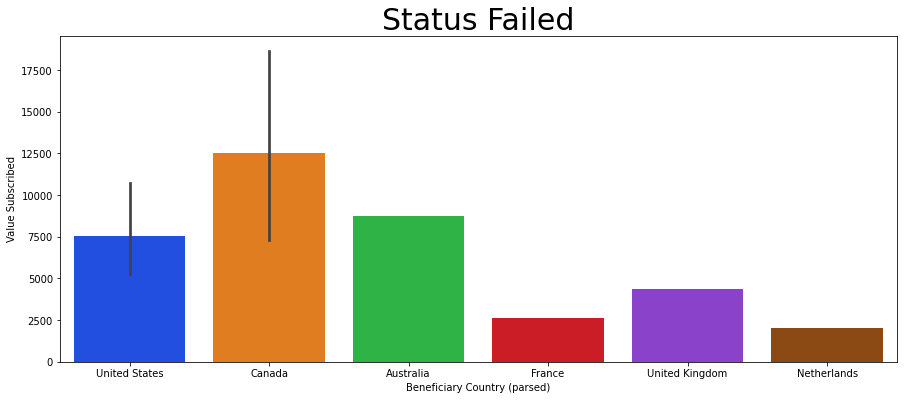

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Beneficiary Country (parsed)',y='Value Subscribed',data=df123[df123['Status_y'] == 'failed'], palette="bright")
plt.title('Status Failed', fontsize = 30)

Text(0.5, 1.0, 'Status Approved')

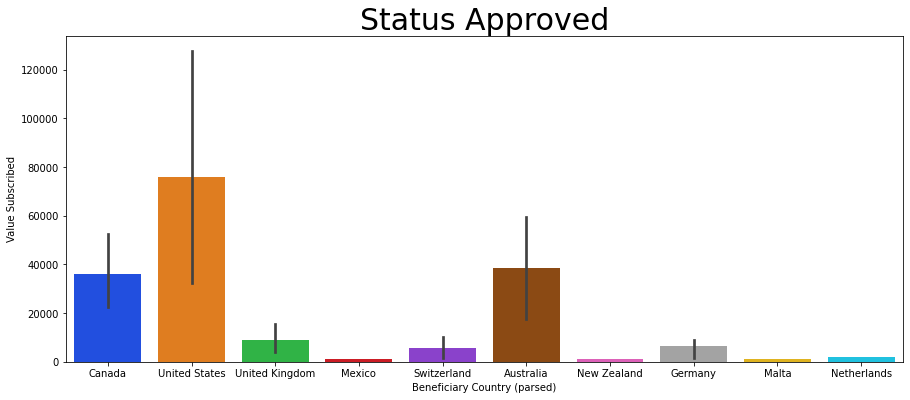

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Beneficiary Country (parsed)',y='Value Subscribed',data=df123[df123['Status_y'] == 'approved'], palette="bright")
plt.title('Status Approved', fontsize = 30)

In [ ]:
df123[df123['Beneficiary Country (parsed)'] == 'United States']['Status_y'].value_counts()

approved     981
failed       109
reversal      14
cancelled      4
Name: Status_y, dtype: int64

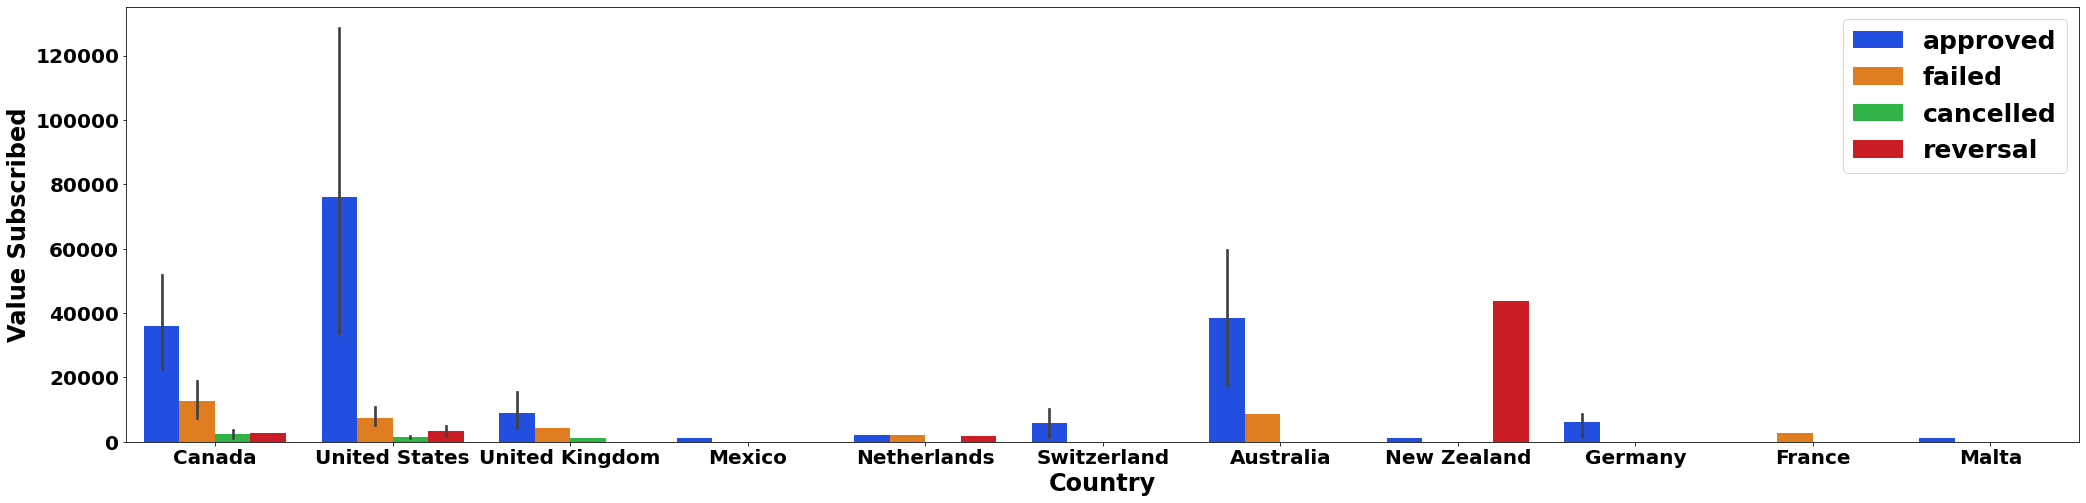

In [ ]:
fig, ax = plt.subplots(figsize=(35,8))
sns.barplot(x='Beneficiary Country (parsed)',y='Value Subscribed',data=df123, hue='Status_y', palette="bright")

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"             # Making everything bold


plt.xlabel('Country', fontsize=24)
plt.ylabel('Value Subscribed', fontsize=24)
ax.xaxis.label.set_color('black')
ax.tick_params(axis='both', which='major', labelsize=20)
#plt.title("Value Subscribed Status Distribution", fontsize = 30)

ax.legend(loc = 'upper right', prop={"size":25})

In [ ]:
fig.savefig('Plot1.png') 

Text(0.5, 1.0, 'USA')

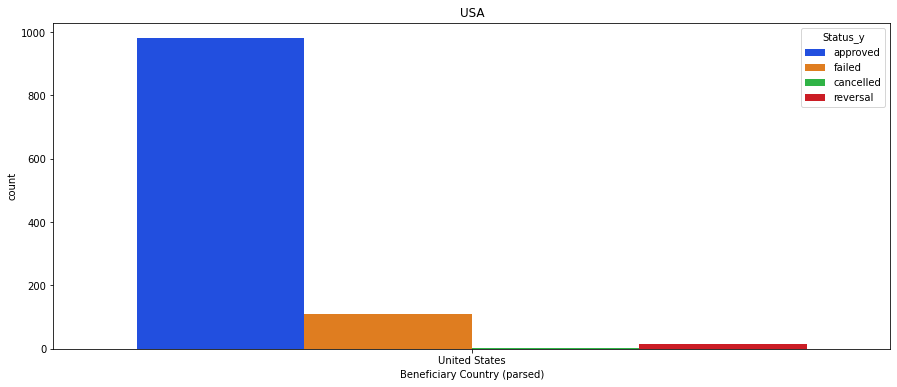

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Beneficiary Country (parsed)',data=df123[df123['Beneficiary Country (parsed)'] == 'United States'], hue='Status_y', palette="bright")
plt.title('USA')

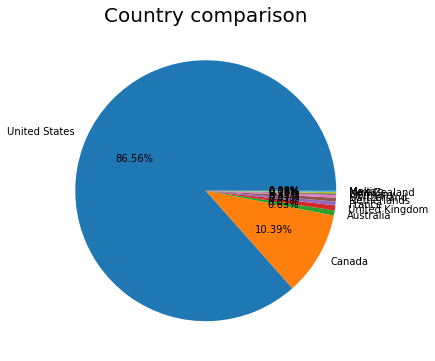

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df123['Beneficiary Country (parsed)'].value_counts(), labels=df123['Beneficiary Country (parsed)'].value_counts().index, autopct='%0.2f%%')
plt.title("Country comparison", fontsize = 20)
plt.show()

In [ ]:
df123.columns

Index(['Investor Name', 'Account Number_x', 'Investor ID_x', 'Email_x',
       'Phone', 'Status_x', 'Payment', 'Documents',
       'Additional Documents Uploaded?', 'Invited Date', 'Signed Date',
       'Accepted Date', 'Value Subscribed', '# of Securities Subscribed',
       'Tags', 'Beneficiary Address', 'Registration Holder Name',
       'Registration Address', 'Email_y', 'Account Number_y', 'Investor ID_y',
       'Transaction Funded by User', 'Currency', 'Date', 'Value', 'Status_y',
       'Book-keeping Date', 'Book-keeping Value', 'Transaction Type',
       'External ID', 'Notes', 'Status', 'Beneficiary Address (as entered)',
       'Beneficiary Street Address (parsed)',
       'Beneficiary Municipality (parsed)',
       'Beneficiary Province/State (parsed)',
       'Beneficiary Postal Code (parsed)', 'Beneficiary Country (parsed)',
       'Registration Address (as entered)',
       'Registration Holder Street Address (parsed)',
       'Registration Holder Municipality (parsed)',

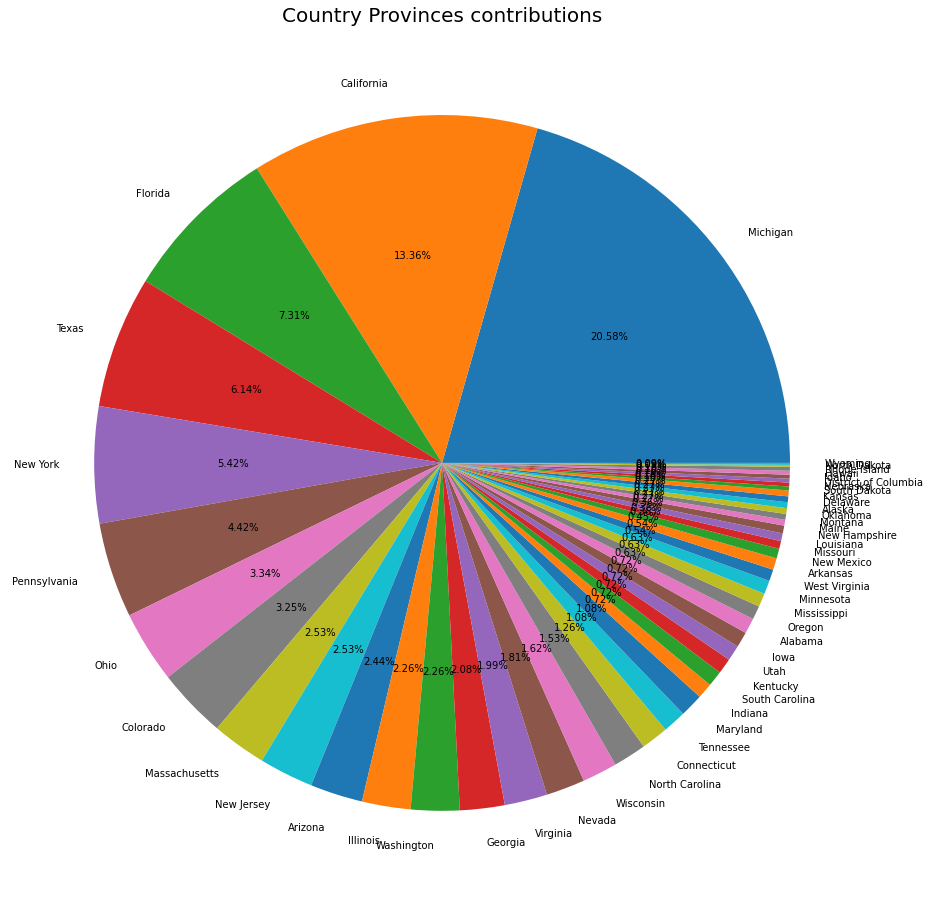

In [ ]:
plt.figure(figsize=(16,16))
plt.pie(x=df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'].value_counts(), 
        labels=df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'].value_counts().index, autopct='%0.2f%%')
plt.title("Country Provinces contributions", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'United States')

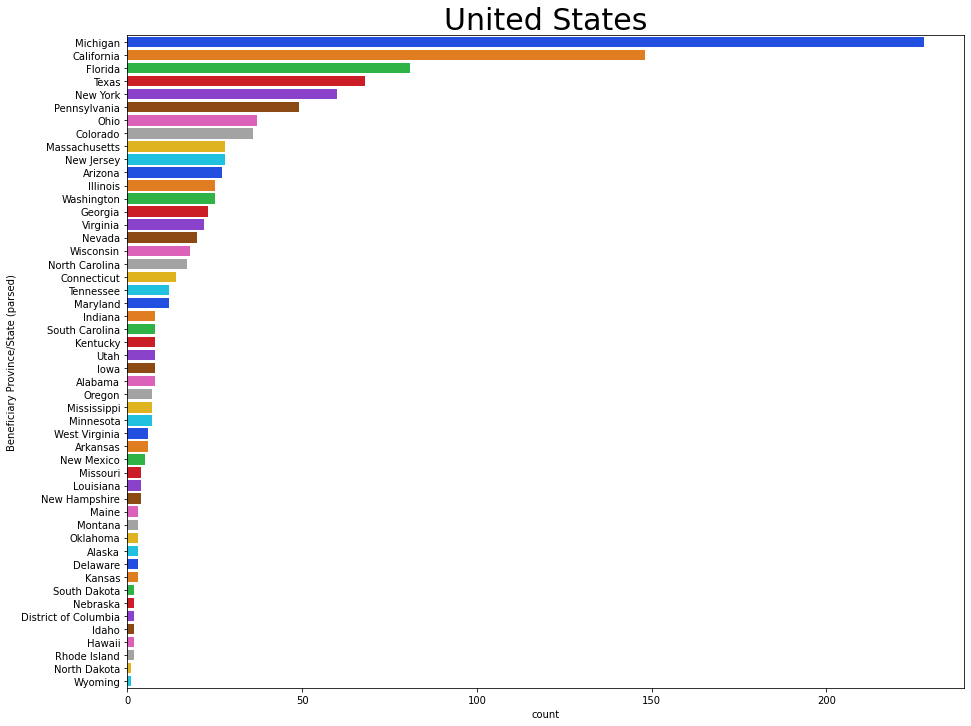

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(y='Beneficiary Province/State (parsed)',data=df123[df123['Beneficiary Country (parsed)'] == 'United States'],
              order = df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'].value_counts().index, 
              palette="bright")
plt.title('United States', fontsize = 30)

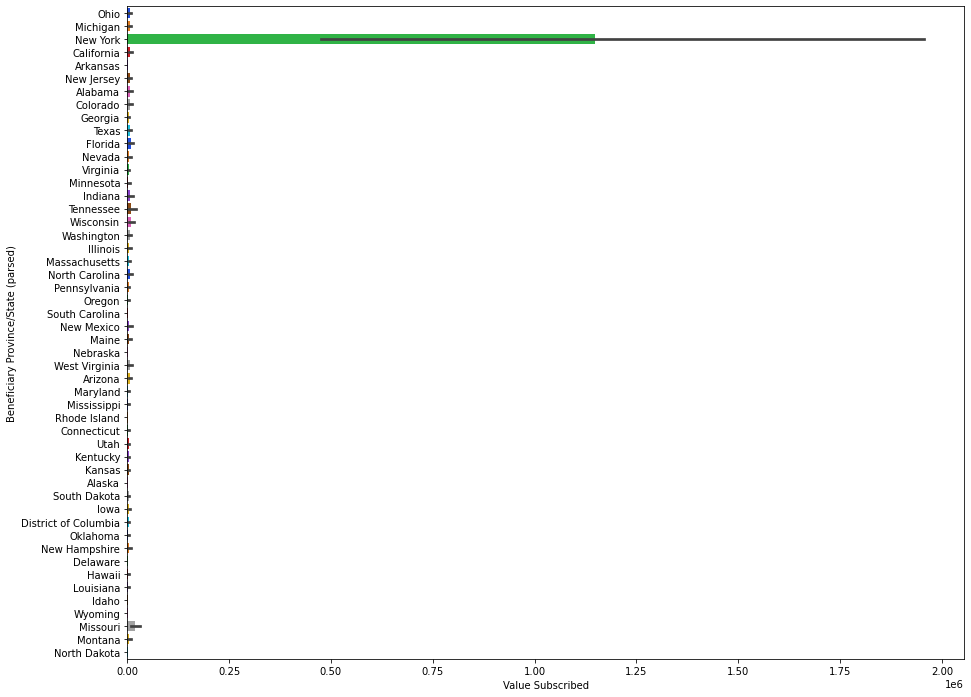

In [125]:
plt.figure(figsize=(15,12))
sns.barplot(x='Value Subscribed', y='Beneficiary Province/State (parsed)',data=df123[df123['Beneficiary Country (parsed)'] == 'United States'], 
              palette="bright")
#plt.title('United States', fontsize = 30)



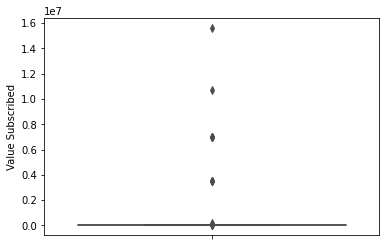

In [38]:
sns.boxplot(y=df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] == 'New York']['Value Subscribed'],
            color='red')

#sns.boxplot(data=df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] == 'New York'].Value)

#### **New York's Value Subscribed values are deeply above the national average.**

In [101]:
df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] == 'New York']['Value Subscribed'].describe()

count    6.000000e+01
mean     1.147334e+06
std      2.982140e+06
min      1.050000e+03
25%      1.750000e+03
50%      3.500000e+03
75%      1.750000e+04
max      1.562500e+07
Name: Value Subscribed, dtype: float64

In [138]:
df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] != 'New York']['Beneficiary Province/State (parsed)'].value_counts()


Michigan                228
California              148
Florida                  81
Texas                    68
Pennsylvania             49
Ohio                     37
Colorado                 36
New Jersey               28
Massachusetts            28
Arizona                  27
Illinois                 25
Washington               25
Georgia                  23
Virginia                 22
Nevada                   20
Wisconsin                18
North Carolina           17
Connecticut              14
Tennessee                12
Maryland                 12
South Carolina            8
Indiana                   8
Kentucky                  8
Utah                      8
Iowa                      8
Alabama                   8
Oregon                    7
Mississippi               7
Minnesota                 7
West Virginia             6
Arkansas                  6
New Mexico                5
Missouri                  4
Louisiana                 4
New Hampshire             4
Maine               

In [51]:
df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] != 'New York'].sort_values('Value Subscribed')

,Investor Name,Account Number_x,Investor ID_x,Email_x,Phone,Status_x,Payment,Documents,Additional Documents Uploaded?,Invited Date,Signed Date,Accepted Date,Value Subscribed,# of Securities Subscribed,Tags,Beneficiary Address,Registration Holder Name,Registration Address,Email_y,Account Number_y,Investor ID_y,Transaction Funded by User,Currency,Date,Value,Status_y,Book-keeping Date,Book-keeping Value,Transaction Type,External ID,Notes,Status,Beneficiary Address (as entered),Beneficiary Street Address (parsed),Beneficiary Municipality (parsed),Beneficiary Province/State (parsed),Beneficiary Postal Code (parsed),Beneficiary Country (parsed),Registration Address (as entered),Registration Holder Street Address (parsed),Registration Holder Municipality (parsed),Registration Holder Province/State (parsed),Registration Holder Postal Code (parsed),Registration Holder Country (parsed)
758,Lizette Beth Belmonte,1204860001,45951,lbmbelmonte@gmail.com,18057120400,Complete,Funded,100% complete,False,2020-12-20 18:38:42 UTC,2020-12-20 18:46:33 UTC,2021-01-05 22:25:20 UTC,1050.00,600,#amlcleared,"800 Brahma St, Paso Robles, CA 93446, USA",NaN,NaN,lbmbelmonte@gmail.com,1.204860e+09,45951,lbmbelmonte@gmail.com,USD,2020-12-20 00:00:00 UTC-05:00,1050.00,approved,2020-12-20 00:00:00 UTC-05:00,1050.0,Ach transfer,it01xslvRm6omi_WIs8aJQ,2020-12-20 18:52:16 UTC: Transaction submitted...,Complete,"800 Brahma St, Paso Robles, CA 93446, USA",800 Brahma Street,Paso Robles,California,93446,United States,NaN,NaN,NaN,NaN,NaN,NaN
469,Colton Allen,4341080001,44700,colton@portcityco.com,12187307963,Complete,Funded,100% complete,False,2020-12-15 01:24:55 UTC,2020-12-15 01:41:05 UTC,2021-01-09 20:43:17 UTC,1050.00,600,NaN,"408 Leicester Ave, Duluth, MN 55803, USA",NaN,NaN,colton@portcityco.com,4.341080e+09,44700,colton@portcityco.com,USD,2020-12-15 00:00:00 UTC-05:00,1050.00,approved,2020-12-15 00:00:00 UTC-05:00,1050.0,Credit card,mDn2hHS6TYKPcTyxflVyiQ,2020-12-15 21:44:35 UTC: Transaction submitted...,Complete,"408 Leicester Ave, Duluth, MN 55803, USA",408 Leicester Avenue,Duluth,Minnesota,55803,United States,NaN,NaN,NaN,NaN,NaN,NaN
467,Domonic Smith,7340840006,44672,dsmithfilm@gmail.com,12698701124,Complete,Funded,100% complete,False,2020-12-14 23:03:32 UTC,2020-12-24 11:18:07 UTC,2021-01-05 22:26:12 UTC,1050.00,600,#amlcleared,"7324 Lumber Port Dr, Ruskin, FL 33573, USA",NaN,NaN,dsmithfilm@gmail.com,7.340840e+09,44672,dsmithfilm@gmail.com,USD,2020-12-24 00:00:00 UTC-05:00,1050.00,approved,2020-12-24 00:00:00 UTC-05:00,1050.0,Credit card,O-KHcj95QWyZ31ZaWjgX3w,2020-12-24 11:21:33 UTC: Transaction submitted...,Complete,"7324 Lumber Port Dr, Ruskin, FL 33573, USA",7324 Lumber Port Drive,Ruskin,Florida,33573,United States,NaN,NaN,NaN,NaN,NaN,NaN
1264,Tracy Allen Hightower,7363950006,48246,tracyahightower@gmail.com,17315711481,Complete,Funded,100% complete,False,2020-12-29 00:03:16 UTC,2020-12-29 00:27:26 UTC,2021-01-05 22:19:37 UTC,1050.00,600,#amlcleared,"1061 Asbury Rd, Camden, TN 38320, USA",NaN,NaN,tracyahightower@gmail.com,7.363950e+09,48246,tracyahightower@gmail.com,USD,2020-12-29 00:00:00 UTC-05:00,1050.00,approved,2020-12-29 00:00:00 UTC-05:00,1050.0,Credit card,ESd9TJBQS0erU0QlU0QkLg,2020-12-29 07:05:52 UTC: Transaction submitted...,Complete,"1061 Asbury Rd, Camden, TN 38320, USA",1061 Asbury Road,Camden,Tennessee,38320,United States,NaN,NaN,NaN,NaN,NaN,NaN
461,THOMAS J LAZICKI SR,5340640004,44648,fpdod4963@gmail.com,15702042771,Complete,Funded,100% complete,False,2020-12-14 21:21:25 UTC,2020-12-14 21:51:41 UTC,2021-01-05 22:13:23 UTC,1050.00,600,#amlcleared,"43 McDowell Hill Rd, Bloomsburg, PA 17815, USA",NaN,NaN,fpdod4963@gmail.com,5.340640e+09,44648,fpdod4963@gmail.com,USD,2020-12-14 00:00:00 UTC-05:00,1050.00,approved,2020-12-14 00:00:00 UTC-05:00,1050.0,Credit card,4VJ2qdM0QPOTq4o0nGtEYw,2020-12-14 21:54:32 UTC: Transaction submitted...,Complete,"43 McDowell Hill Rd, Bloomsburg, PA 17815, USA",43 McDowell Hill Road,Bloomsburg,Pennsylvania,17815,Un

Text(0.5, 0, 'Value Subscribed')

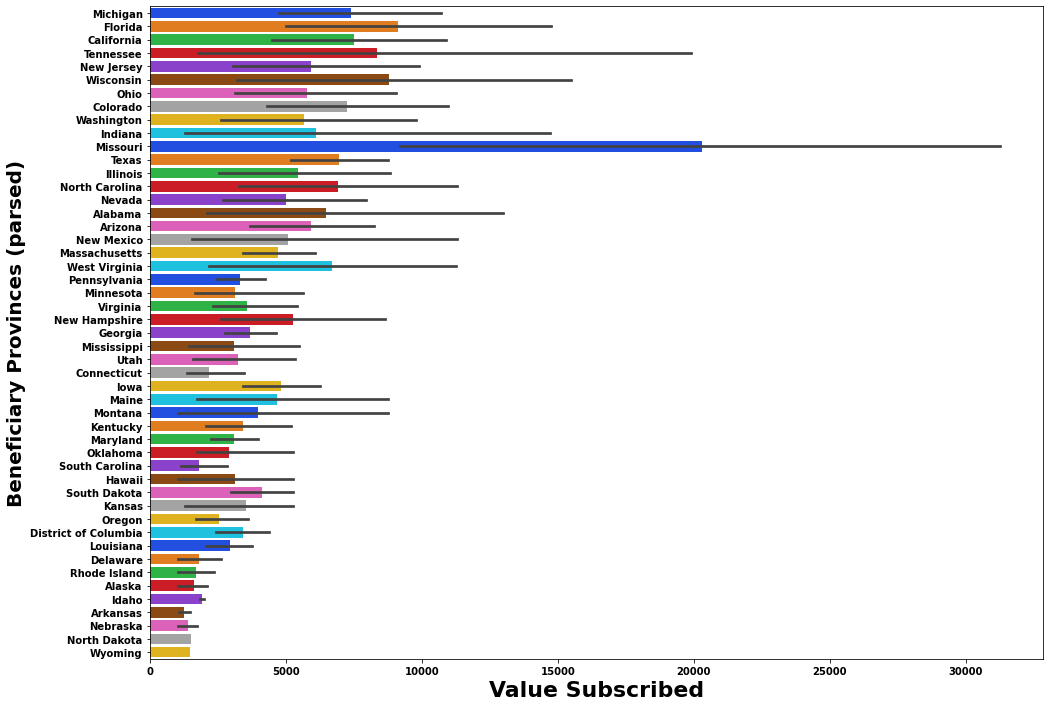

In [64]:
fig1, ax1 = plt.subplots(figsize=(16,12))     
sns.barplot(x='Value Subscribed', y='Beneficiary Province/State (parsed)',
            data=df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] != 'New York'].sort_values('Value Subscribed', ascending=False),
            palette="bright")
#plt.title('United States', fontsize = 30)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"             # Making everything bold


plt.ylabel('Beneficiary Provinces (parsed)', fontsize=20)
plt.xlabel('Value Subscribed', fontsize=22)


In [65]:
fig1.savefig('Plot1USA.png') 

Text(0.5, 0, 'Value Subscribed')

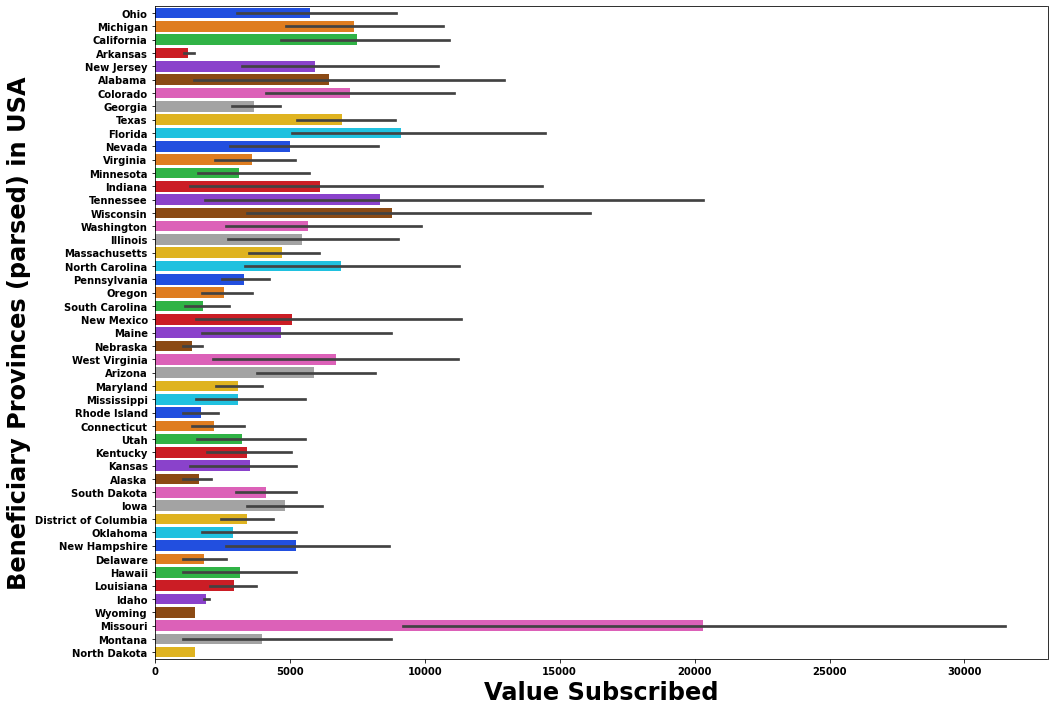

In [156]:
fig1, ax1 = plt.subplots(figsize=(16,12))     
sns.barplot(x='Value Subscribed', y='Beneficiary Province/State (parsed)',
            data=df123[df123['Beneficiary Country (parsed)'] == 'United States'][df123[df123['Beneficiary Country (parsed)'] == 'United States']['Beneficiary Province/State (parsed)'] != 'New York'], 
              palette="bright")
#plt.title('United States', fontsize = 30)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"             # Making everything bold


plt.ylabel('Beneficiary Provinces (parsed) in USA', fontsize=24)
plt.xlabel('Value Subscribed', fontsize=24)



Text(0.5, 1.0, 'Canada Provinces contribution')

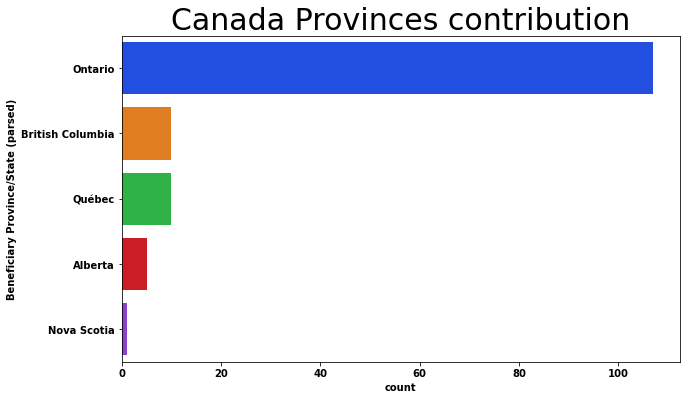

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(y='Beneficiary Province/State (parsed)',data=df123[df123['Beneficiary Country (parsed)'] == 'Canada'],
              order = df123[df123['Beneficiary Country (parsed)'] == 'Canada']['Beneficiary Province/State (parsed)'].value_counts().index, 
              palette="bright")
plt.title('Canada Provinces contribution', fontsize = 30)

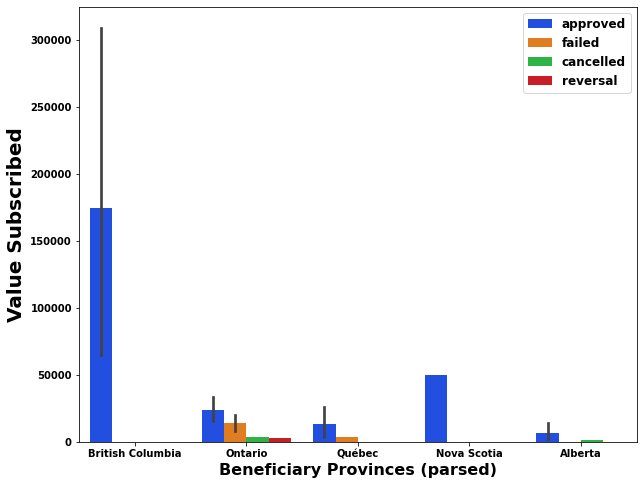

In [99]:
fig2, ax2 = plt.subplots(figsize=(10,8))     
sns.barplot(x='Beneficiary Province/State (parsed)', y='Value Subscribed',
            data=df123[df123['Beneficiary Country (parsed)'] == 'Canada'].sort_values('Value Subscribed', ascending=False), 
            hue='Status_y', palette="bright")
#plt.title('Canada', fontsize = 30)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"             # Making everything bold


plt.xlabel('Beneficiary Provinces (parsed)', fontsize=16)
plt.ylabel('Value Subscribed', fontsize=20)

ax2.legend(loc = 'upper right', prop={"size":12})



In [100]:
fig2.savefig('Plot2CANADA.png') 

In [85]:
df123[df123['Beneficiary Province/State (parsed)'] == 'British Columbia']['Value Subscribed'].describe()

count        10.000000
mean     174371.050000
std      206984.307913
min        1750.000000
25%       37187.500000
50%       72625.000000
75%      205980.250000
max      542500.000000
Name: Value Subscribed, dtype: float64

In [87]:
df123[df123['Beneficiary Province/State (parsed)'] == 'Ontario']['Value Subscribed'].describe()

count       107.000000
mean      22092.785047
std       41534.712773
min        1050.000000
25%        2100.000000
50%        7770.000000
75%       22519.000000
max      253750.000000
Name: Value Subscribed, dtype: float64

In [102]:
df123[df123['Beneficiary Province/State (parsed)'] == 'Québec']['Value Subscribed'].describe()

count       10.000000
mean     11290.125000
std      15876.610269
min       1050.000000
25%       2450.000000
50%       3500.000000
75%      10500.000000
max      51502.500000
Name: Value Subscribed, dtype: float64

In [103]:
df123[df123['Beneficiary Province/State (parsed)'] == 'Alberta']['Value Subscribed'].describe()

count        5.000000
mean      5495.000000
std       6926.994298
min       1050.000000
25%       1050.000000
50%       2625.000000
75%       5250.000000
max      17500.000000
Name: Value Subscribed, dtype: float64

In [89]:
df123[df123['Beneficiary Country (parsed)'] == 'Canada'][df123[df123['Beneficiary Country (parsed)'] == 'Canada']['Beneficiary Province/State (parsed)'] == 'British Columbia'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 481 to 1355
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Investor Name                                10 non-null     object 
 1   Account Number_x                             10 non-null     object 
 2   Investor ID_x                                10 non-null     int64  
 3   Email_x                                      10 non-null     object 
 4   Phone                                        10 non-null     object 
 5   Status_x                                     10 non-null     object 
 6   Payment                                      10 non-null     object 
 7   Documents                                    10 non-null     object 
 8   Additional Documents Uploaded?               10 non-null     bool   
 9   Invited Date                                 10 non-null     object 
 10  

In [90]:
df123[df123['Beneficiary Country (parsed)'] == 'Canada'][df123[df123['Beneficiary Country (parsed)'] == 'Canada']['Beneficiary Province/State (parsed)'] == 'British Columbia']['Beneficiary Province/State (parsed)'].value_counts()

British Columbia    10
Name: Beneficiary Province/State (parsed), dtype: int64

In [92]:
df123[df123['Beneficiary Country (parsed)'] == 'Canada'][df123[df123['Beneficiary Country (parsed)'] == 'Canada']['Beneficiary Province/State (parsed)'] == 'British Columbia']['Value Subscribed'].describe()

count        10.000000
mean     174371.050000
std      206984.307913
min        1750.000000
25%       37187.500000
50%       72625.000000
75%      205980.250000
max      542500.000000
Name: Value Subscribed, dtype: float64

In [93]:
df123[df123['Beneficiary Country (parsed)'] == 'Canada'][df123[df123['Beneficiary Country (parsed)'] == 'Canada']['Beneficiary Province/State (parsed)'] == 'Ontario']['Value Subscribed'].describe()

count       107.000000
mean      22092.785047
std       41534.712773
min        1050.000000
25%        2100.000000
50%        7770.000000
75%       22519.000000
max      253750.000000
Name: Value Subscribed, dtype: float64

In [ ]:
df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts()

San Francisco                  11
Round Rock                      8
Wilmington                      5
East Brunswick                  4
Orion charter Township          4
                               ..
Carlisle                        1
Jericho                         1
Plainfield charter Township     1
Washington                      1
Cedar Park                      1
Name: Registration Holder Municipality (parsed), Length: 110, dtype: int64

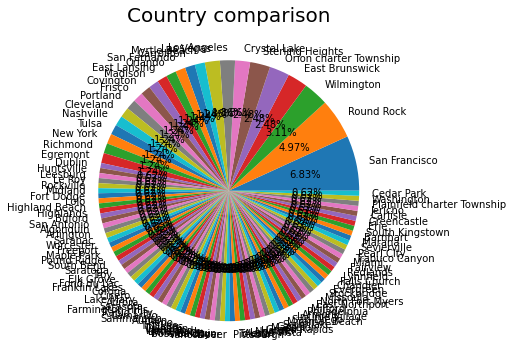

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts(), 
        labels=df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts().index, autopct='%0.2f%%')
plt.title("Country comparison", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Status Approved')

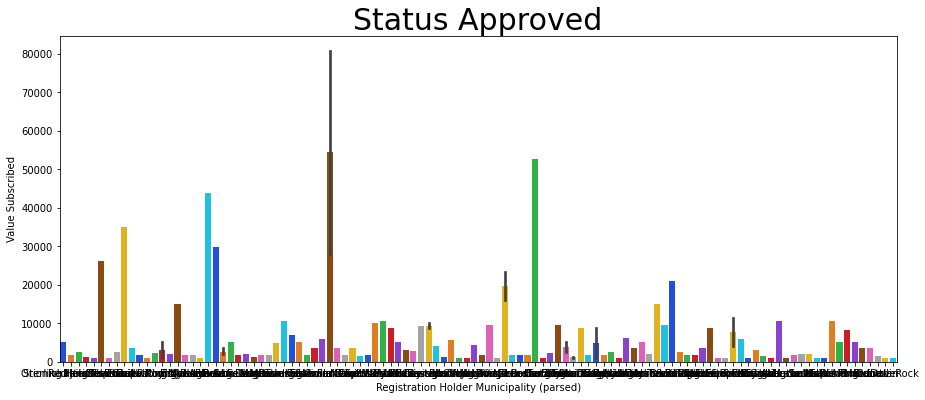

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Registration Holder Municipality (parsed)',y='Value Subscribed',data=df123[df123['Beneficiary Country (parsed)'] == 'United States'], palette="bright")
plt.title('Status Approved', fontsize = 30)

Text(0.5, 1.0, 'Status Approved')

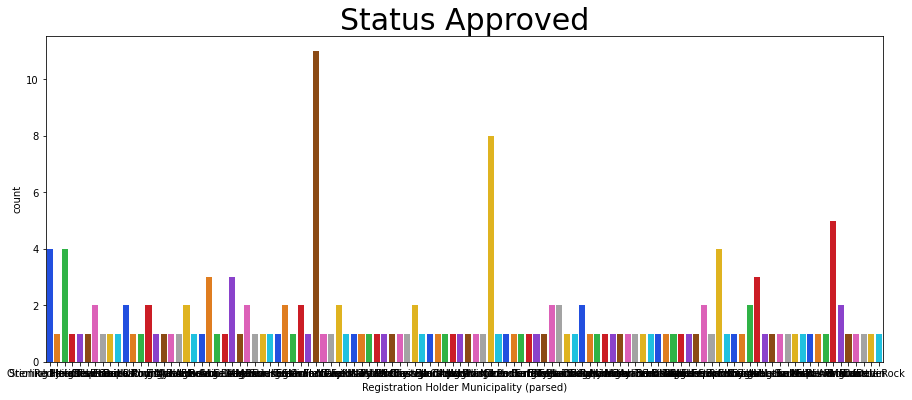

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Registration Holder Municipality (parsed)',data=df123[df123['Beneficiary Country (parsed)'] == 'United States'], palette="bright")
plt.title('Status Approved', fontsize = 30)


In [ ]:
df123[df123['Beneficiary Country (parsed)'] == 'United States']
[df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts() > 3]


#df[(df['col1']>2) & (df['col2']==444)]



df123[(df123['Beneficiary Country (parsed)'] == 'United States') & (df123['Registration Holder Municipality (parsed)'].value_counts() > 3)]
[df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts() > 3]

[San Francisco                   True
 Round Rock                      True
 Wilmington                      True
 East Brunswick                  True
 Orion charter Township          True
                                ...  
 Carlisle                       False
 Jericho                        False
 Plainfield charter Township    False
 Washington                     False
 Cedar Park                     False
 Name: Registration Holder Municipality (parsed), Length: 110, dtype: bool]

In [ ]:
#df123[(df123['Beneficiary Country (parsed)'] == 'United States') & (df123['Registration Holder Municipality (parsed)'].value_counts() == 3)].info()

#df123['Registration Holder Municipality (parsed)'].value_counts() > 3



df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts() > 3

San Francisco                   True
Round Rock                      True
Wilmington                      True
East Brunswick                  True
Orion charter Township          True
                               ...  
Carlisle                       False
Jericho                        False
Plainfield charter Township    False
Washington                     False
Cedar Park                     False
Name: Registration Holder Municipality (parsed), Length: 110, dtype: bool

In [ ]:
df123[df123['Beneficiary Country (parsed)'] == 'United States']['Registration Holder Municipality (parsed)'].value_counts() > 3

San Francisco                   True
Round Rock                      True
Wilmington                      True
East Brunswick                  True
Orion charter Township          True
                               ...  
Carlisle                       False
Jericho                        False
Plainfield charter Township    False
Washington                     False
Cedar Park                     False
Name: Registration Holder Municipality (parsed), Length: 110, dtype: bool

In [ ]:
df123.loc[(df123['Beneficiary Country (parsed)'] == 'United States') & (df123['Registration Holder Municipality (parsed)'].value_counts() == 3)]



#newdf = df.loc[(df.origin == "JFK") & (df.carrier == "B6")]

,Investor Name,Account Number_x,Investor ID_x,Email_x,Phone,Status_x,Payment,Documents,Additional Documents Uploaded?,Invited Date,Signed Date,Accepted Date,Value Subscribed,# of Securities Subscribed,Tags,Beneficiary Address,Registration Holder Name,Registration Address,Email_y,Account Number_y,Investor ID_y,Transaction Funded by User,Currency,Date,Value,Status_y,Book-keeping Date,Book-keeping Value,Transaction Type,External ID,Notes,Status,Beneficiary Address (as entered),Beneficiary Street Address (parsed),Beneficiary Municipality (parsed),Beneficiary Province/State (parsed),Beneficiary Postal Code (parsed),Beneficiary Country (parsed),Registration Address (as entered),Registration Holder Street Address (parsed),Registration Holder Municipality (parsed),Registration Holder Province/State (parsed),Registration Holder Postal Code (parsed),Registration Holder Country (parsed)
